In [1]:
from scipy.stats import ttest_1samp, mannwhitneyu
import numpy as np
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.stats.power import TTestIndPower
from scipy.stats import kstest

In [2]:
df = pd.read_excel('результаты А_B.xlsx')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [4]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


**Проверяем распределениепользователей по обеим группам 

In [5]:
df.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

пользователи распределы по группам равномерно

**проверяем уникальных пользователей

In [6]:
df['userid'].nunique()

90189

Все пользователи в выборке уникальны

**Рассчитываем среднее количество раундов в контрольной и тестовой выборках

In [7]:
df[df["version"]=="gate_30"].sum_gamerounds.mean()

52.45626398210291

In [8]:

df[df["version"]=="gate_40"].sum_gamerounds.mean()


51.29877552814966

**Рассчитываем количество вернувшихся пользователей через сутки в обеих группах:

In [9]:
K_С1=df[(df.version=="gate_30") & (df.retention_1 == 1)].retention_1.count()
K_С1

20034

In [10]:
K_T1=df[(df.version=="gate_40") & (df.retention_1 == 1)].retention_1.count()
K_T1

20119

**Рассчитываем количество вернувшихся пользователей через 7 суток в обеих группах:

In [11]:
K_С7=df[(df.version=="gate_30") & (df.retention_7 == 1)].retention_7.count()
K_С7

8502

In [12]:
K_T7=df[(df.version=="gate_40") & (df.retention_7 == 1)].retention_7.count()
K_T7

8279

**Рассчитываем общее количество пользователей в каждой из двух групп:

In [13]:
n_c= df[df.version=="gate_30" ].version.count()
n_c

44700

In [14]:
n_t= df[df.version=="gate_40" ].version.count()
n_t

45489

**Проведем Z-тест для  пользователей вернувшихся на 1 день

In [15]:
from statsmodels.stats import proportion
z_score, z_pvalue = proportion.proportions_ztest(np.array([K_С1, K_T1]),
np.array([n_c, n_t]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =1.784, pvalue = 0.074


**Проведем Z-тест для  пользователей вернувшихся на 7 день

In [16]:
from statsmodels.stats import proportion
z_score, z_pvalue = proportion.proportions_ztest(np.array([K_С7, K_T7]),
np.array([n_c, n_t]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =3.164, pvalue = 0.002


*pvalue = 0.002< 0.05- статистически значимые различия между группами есть, **не в пользу новой версии- количество пользователей 7 дня меньше, при том что размер тестовой группы больше

**Тест Хи-квадрат

In [17]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([K_С1, K_T1]),
np.array([n_c, n_t]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =3.183, pvalue = 0.074


In [18]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([K_С7, K_T7]),
np.array([n_c, n_t]))
print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =10.013, pvalue = 0.002


*Тест показал аналогичные результаты

**Сравним группы по количеству раундов

Проверяем на нормальность

In [19]:
data_С=df[df.version=="gate_30"].sum_gamerounds




0         3
1        38
6         0
11        0
13       39
         ..
90179    14
90180     7
90182    21
90183    10
90186    28
Name: sum_gamerounds, Length: 44700, dtype: int64

In [20]:
kstest(data_С, 'norm')

KstestResult(statistic=0.8724176532867202, pvalue=0.0)

In [21]:
data_T=df[df.version=="gate_40"].sum_gamerounds


2        165
3          1
4        179
5        187
7          2
        ... 
90181     10
90184     97
90185     30
90187     51
90188     16
Name: sum_gamerounds, Length: 45489, dtype: int64

In [22]:
kstest(data_T, 'norm')

KstestResult(statistic=0.8707186187388001, pvalue=0.0)

*Оба распределения не нормальны

In [23]:
mw_stats = mannwhitneyu(x=data_С.values, y = data_T.values)

mw_stats

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

*pvalue=0.05 равно критическому, проверим гипотезу методом бутстрап

**Бутстрап

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt
from tqdm.auto import tqdm #для красивой полоски

plt.style.use('ggplot')

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

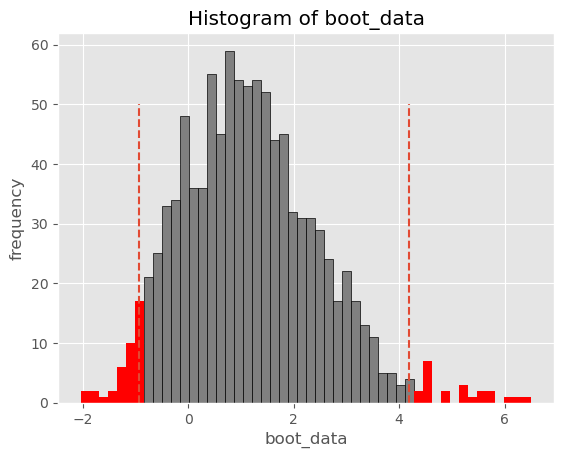

{'p_value': 0.3708708693582019}

In [25]:
get_bootstrap(data_С, data_T)

*Расчеты данным методом показывают, что статистически значимых различий между двумя группами нет.

**Рекомендации: Учитывая результаты тестов по различным параметрам (возврат на 1и 7 дни и количество раундов), рекомендую не выкатывать новую версию игры